In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import missingno as msno
import seaborn as sns
%matplotlib inline
import math
from scipy import stats
from scipy.stats import multivariate_normal as mvn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import plotly
plotly.tools.set_credentials_file(username='bmoore49', api_key='xnI7D5RMqkWnQzD76tDx')
import plotly.plotly as py

pd.set_option('display.max_columns', None)

# The below suppresses all warnings in the notebook
# Only leave this uncommented for display purposes
import warnings
warnings.filterwarnings("ignore")

## Import Data

This dataset can be found on this page:<br>
https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

In [2]:
# Initialize paths and file name for loading data
data_folder = '/Users/bryan/Dropbox/_Shared Between Priyanka and Bryan/_UNL Materials/CSCE 878/Final Project/Facebook_metrics'
# data_folder='/Users/priyanka/Dropbox/shared between priyanka and bryan/_UNL Materials/CSCE 878/Final Project/Facebook_metrics'
properties_file = 'dataset_Facebook.csv'

# Load in data as pandas file
data_df = pd.read_csv(data_folder + '/' + properties_file,';')

# Shuffle rows
data_df_df = data_df.sample(frac=1)
print('The are %i features in this dataset' %len(data_df.columns))

# Make sure no rows corresponding to missing entries for target (logerror)
# merged_df=merged_df[~merged_df['logerror'].isnull()]
# missingdata_df=merged_df.dropna()
# missingdata_df.shape
data_df.head()

The are 19 features in this dataset


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# We now one-hot encode the 'type' feature and include these in the dataframe

merged_df = pd.get_dummies(data_df,prefix=['type'])

merged_df.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,type_Link,type_Photo,type_Status,type_Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,0,1,0,0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,0,0,1,0
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,0,1,0,0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,0,1,0,0
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,0,1,0,0


In [4]:
merged_df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,type_Link,type_Photo,type_Status,type_Video
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000,0.044000,0.852000,0.090000,0.014000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118,0.205301,0.355456,0.286468,0.117608
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000,0.000000,1.000000,0.000000,0.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000,0.000000,1.000000,0.000000,0.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000,0.000000,1.000000,0.000000,0.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Holds boolean whether entry is null or not
def nan_investigation(df):
    num_entries = df.shape[0]
    df_titles = list(df.columns.values)
    nan_count_df = pd.DataFrame(columns=df_titles,index=['Tot_Null','Tot_Not_Null','Perc_Null'])
    for column in df:
        nan_sum = df[column].isnull().sum()
        nan_count_df.set_value('Tot_Null', column, nan_sum)
        nan_count_df.set_value('Tot_Not_Null', column, num_entries-nan_sum)
        nan_count_df.set_value('Perc_Null', column, nan_sum/num_entries)

    display(nan_count_df)

In [6]:
# Check to see if any values are actually missing
nan_investigation(merged_df)

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,type_Link,type_Photo,type_Status,type_Video
Tot_Null,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,499,500,500,500,500,500,500,500,500,500,499,496,500,500,500,500,500
Perc_Null,0,0,0,0,0,0.002,0,0,0,0,0,0,0,0,0,0.002,0.008,0,0,0,0,0


In [7]:
# From above we see that one value is missing from Paid and one value is missing from like
# 4 are missing from share
# We believe it is safe to use mean imputation to replace these

merged_df['Paid'].fillna((merged_df['Paid'].mean()), inplace=True)
merged_df['like'].fillna((merged_df['like'].mean()), inplace=True)
merged_df['share'].fillna((merged_df['share'].mean()), inplace=True)
nan_investigation(merged_df)

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,type_Link,type_Photo,type_Status,type_Video
Tot_Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# For our investigation we choose to make our target feature (Page total likes)
# We now investigate correlations with that feature
merged_df.corr()['Page total likes'].abs().sort_values(ascending=False)

Page total likes                                                       1.000000
Post Month                                                             0.941192
type_Status                                                            0.182867
Lifetime Post Consumers                                                0.149129
Post Hour                                                              0.143807
Lifetime Post Consumptions                                             0.128240
type_Photo                                                             0.123977
Lifetime Engaged Users                                                 0.111922
Lifetime Post Total Impressions                                        0.102540
Lifetime Post Impressions by people who have liked your Page           0.096109
Category                                                               0.091142
type_Link                                                              0.090147
type_Video                              

In [9]:
# For this test, to see how effective imputation is on a limited number of instances and highly correlated feature
# We make the imputation target Post_Month
# We will randomly set 50% of nan

nanidx = merged_df.sample(frac=0.5).index
merged_df['Post Month'][nanidx] = np.NaN

nan_investigation(merged_df)

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,type_Link,type_Photo,type_Status,type_Video
Tot_Null,0,0,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tot_Not_Null,500,500,250,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
Perc_Null,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Make a copy of this full model for later
df_orig = merged_df

In [11]:
# We now drop all features with a correlation of less than 10% with our target
keep_list=['Page total likes','Post Month','type_Status','Lifetime Post Consumers','Post Hour',
           'Lifetime Post Consumptions','type_Photo','Lifetime Engaged Users','Lifetime Post Total Impressions']
merged_df = merged_df[keep_list]

In [12]:
# We now investigate how correlated each feature is with each other and remove redundant features
merged_df.corr()

,Page total likes,Post Month,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,type_Photo,Lifetime Engaged Users,Lifetime Post Total Impressions
Page total likes,1.000000,0.941192,0.182867,-0.149129,-0.143807,-0.128240,-0.123977,-0.111922,-0.102540
Post Month,0.941192,1.000000,0.195747,-0.163687,-0.206292,-0.220316,-0.205163,-0.137728,-0.121796
type_Status,0.182867,0.195747,1.000000,0.410499,-0.042916,0.224030,-0.754553,0.357901,-0.021894
Lifetime Post Consumers,-0.149129,-0.163687,0.410499,1.000000,0.012222,0.706666,-0.294846,0.968213,0.315201
Post Hour,-0.143807,-0.206292,-0.042916,0.012222,1.000000,0.078759,0.086673,0.003879,0.012747
Lifetime Post Consumptions,-0.128240,-0.220316,0.224030,0.706666,0.078759,1.000000,-0.139384,0.676840,0.226081
type_Photo,-0.123977,-0.205163,-0.754553,-0.294846,0.086673,-0.139384,1.000000,-0.247235,-0.018495
Lifetime Engaged Users,-0.111922,-0.137728,0.357901,0.968213,0.003879,0.676840,-0.247235,1.000000,0.368553
Lifetime Post Total Impressions,-0.102540,-0.121796,-0.021894,0.315201,0.012747,0.226081,-0.018495,0.368553,1.000000


We note that Lifetime Engaged Users and Lifetime Post Consumers are highly correlated. We will drop lifetime engaged users as it has a lower correlation with our target.<br>
No other features are extremely correlated with each other.<br>

In [13]:
df_new = merged_df.drop(columns=['Lifetime Engaged Users'])

In [14]:
# Definition to calculate correlation coefficient, which will be used below for inclusion in the seaborn plots
def corrfunc(x, y, **kws):
    r,_ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.1, .6), xycoords=ax.transAxes, size = 24)
# This is a definition to create the pairwise seaborn plots
def create_pairwise_plots(df):
    cmap = sns.cubehelix_palette(light=1, dark = 0.1, hue = 0.5, as_cmap=True)
    sns.set_context(font_scale=2)
    g = sns.PairGrid(df) # Set up pair grid
    g.map_upper(plt.scatter, s=10, color = 'red') # Set up scatter plot on the upper triangle
#     g.map_diag(sns.distplot, kde=False, color = 'red') # Set up distribution on the diagonal
#     g.map_lower(sns.kdeplot, cmap = cmap) # Include density Plot on the lower triangle
#     g.map_lower(corrfunc); # Add correlation coefficients to density plots on the lower triangle

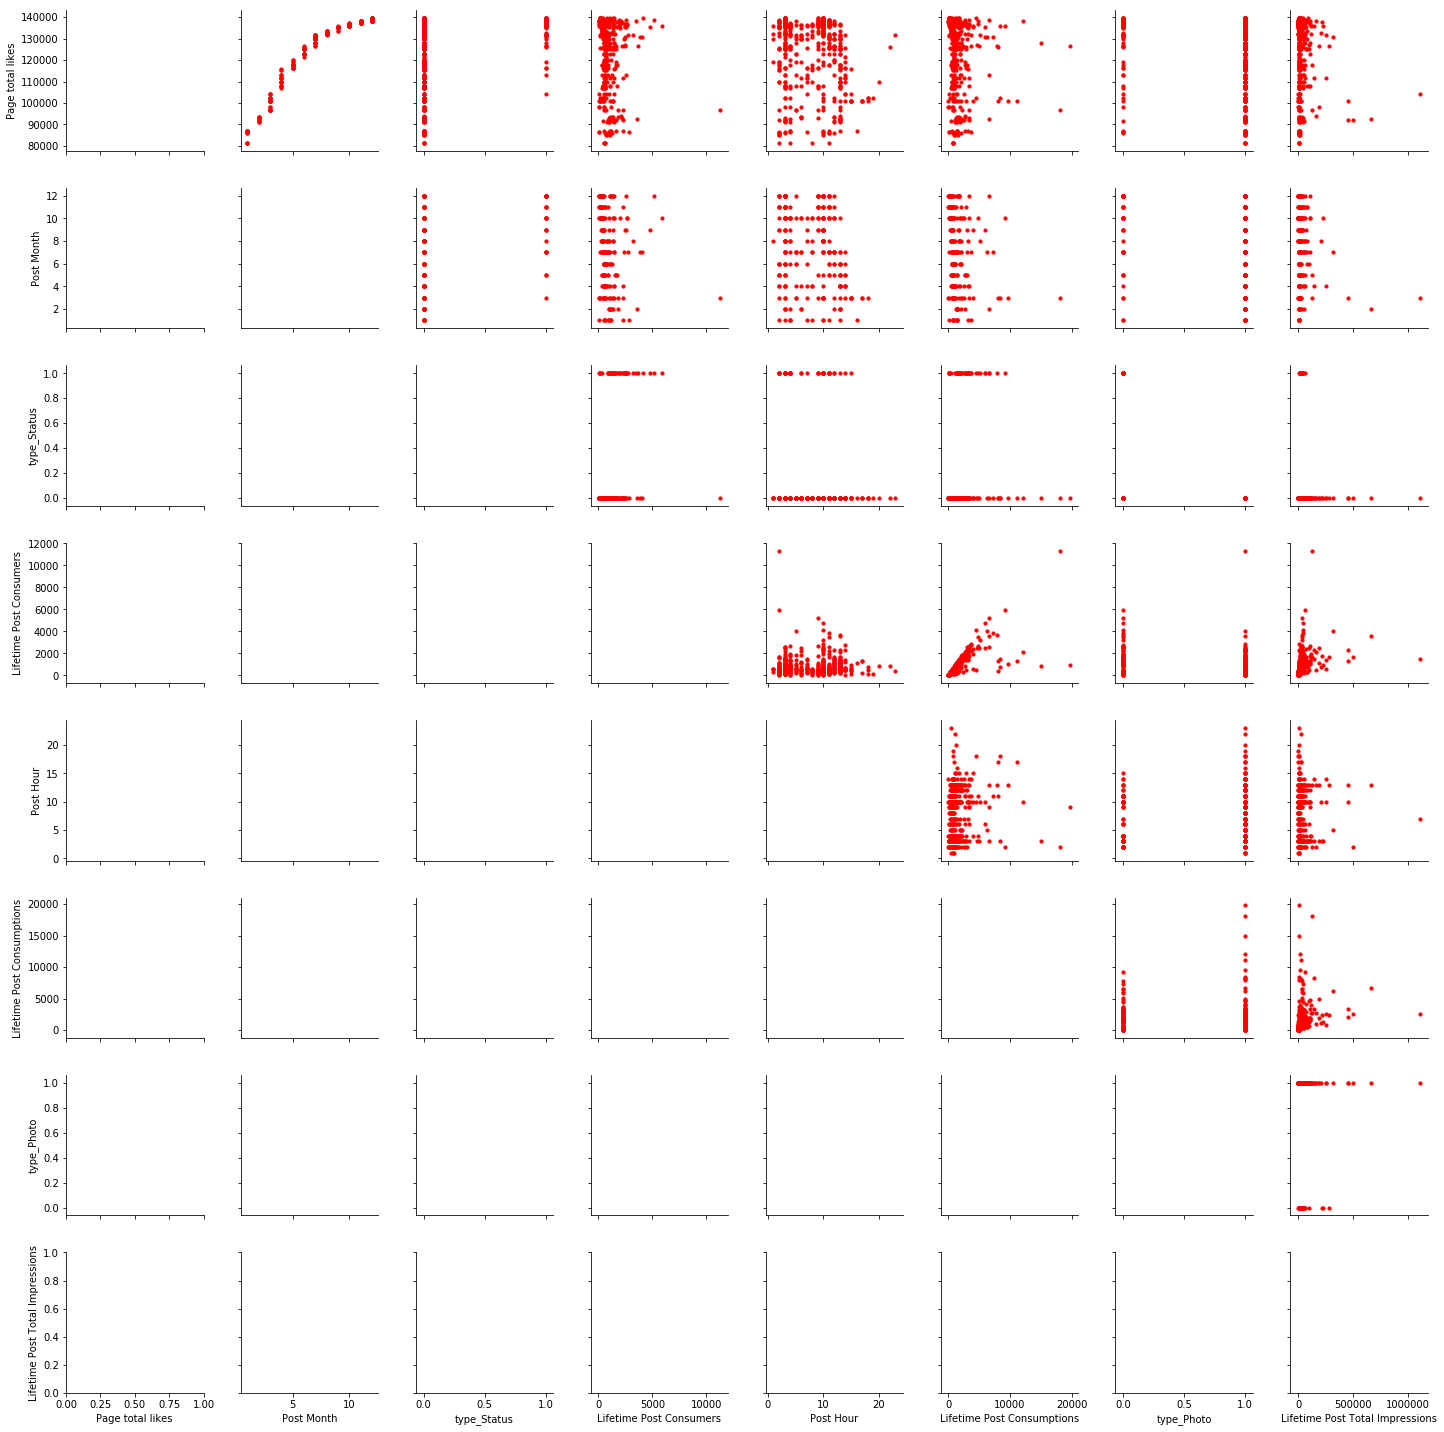

In [15]:
# Now create pairwise plots to see if any other features should be removed
create_pairwise_plots(df_new)

Aside from correlations with the target, which are fine, we see no reason to remove any additional features based on redundancy.

In [16]:
df_new.corr()['Page total likes'].abs().sort_values(ascending=False)

Page total likes                   1.000000
Post Month                         0.941192
type_Status                        0.182867
Lifetime Post Consumers            0.149129
Post Hour                          0.143807
Lifetime Post Consumptions         0.128240
type_Photo                         0.123977
Lifetime Post Total Impressions    0.102540
Name: Page total likes, dtype: float64

In [17]:
# To avoid problems due to lack of training instances we will restrict ourselves to using only the top 5 features
model_list = ['Page total likes','Post Month','type_Status','Lifetime Post Consumers','Post Hour','Lifetime Post Consumptions']
df_model = df_new[model_list]

## Select Model For Imputing Missing Data in Post Month

In [18]:
# Now start again with the full dataframe
# To avoid bias we will drop the main target from this feature list
imputational_model = df_orig.drop(columns=['Page total likes'])

In [19]:
top_correlated=imputational_model.corr()['Post Month'].abs().sort_values(ascending=False)
print(top_correlated)

Post Month                                                             1.000000
Lifetime Post Consumptions                                             0.220316
Post Hour                                                              0.206292
type_Photo                                                             0.205163
type_Status                                                            0.195747
Lifetime Post Consumers                                                0.163687
Category                                                               0.156799
Lifetime Engaged Users                                                 0.137728
Lifetime Post Impressions by people who have liked your Page           0.127911
Lifetime Post Total Impressions                                        0.121796
Lifetime Post reach by people who like your Page                       0.119675
Lifetime Post Total Reach                                              0.118107
type_Video                              

In [20]:
# We will only keep those which have more than 5% correlation with the imputation target (Post Month)
drop_list = ['Lifetime Post reach by people who like your Page','type_Link','Paid','comment',
             'Lifetime People who have liked your Page and engaged with your post',
             'share','Post Weekday']
imputational_model = imputational_model.drop(columns=drop_list)

In [21]:
# Now look at correlations between these features and remove redundant features
imputational_model.corr()

,Category,Post Month,Post Hour,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,like,Total Interactions,type_Photo,type_Status,type_Video
Category,1.000000,-0.156799,-0.107383,-0.142073,-0.094368,0.003392,-0.031172,-0.149443,-0.047803,0.126651,0.127307,0.106585,0.052507,-0.123100
Post Month,-0.156799,1.000000,-0.206292,-0.118107,-0.121796,-0.137728,-0.163687,-0.220316,-0.127911,0.003317,-0.002312,-0.205163,0.195747,0.057530
Post Hour,-0.107383,-0.206292,1.000000,0.003338,0.012747,0.003879,0.012222,0.078759,0.038892,-0.024523,-0.027421,0.086673,-0.042916,0.023871
Lifetime Post Total Reach,-0.142073,-0.118107,0.003338,1.000000,0.694926,0.570629,0.477908,0.324362,0.322254,0.545015,0.538597,-0.080852,-0.011413,0.195655
Lifetime Post Total Impressions,-0.094368,-0.121796,0.012747,0.694926,1.000000,0.368553,0.315201,0.226081,0.850787,0.345047,0.343358,-0.018495,-0.021894,0.113428
Lifetime Engaged Users,0.003392,-0.137728,0.003879,0.570629,0.368553,1.000000,0.968213,0.676840,0.260346,0.569105,0.572159,-0.247235,0.357901,0.095258
Lifetime Post Consumers,-0.031172,-0.163687,0.012222,0.477908,0.315201,0.968213,1.000000,0.706666,0.222941,0.348891,0.354502,-0.294846,0.410499,0.106227
Lifetime Post Consumptions,-0.149443,-0.220316,0.078759,0.324362,0.226081,0.676840,0.706666,1.000000,0.164813,0.235523,0.238082,-0.139384,0.224030,0.070652
Lifetime Post Impressions by people who have liked your Page,-0.047803,-0.127911,0.038892,0.322254,0.850787,0.260346,0.222941,0.164813,1.000000,0.253114,0.250083,-0.013814,0.009992,0.052633
like,0.126651,0.003317,-0.024523,0.545015,0.345047,0.569105,0.348891,0.235523,0.253114,1.000000,0.997393,0.034605,-0.001203,0.019746


Lifetime Post Impressions by people who have liked your Page and Lifetime Post Total Impressions have correlation of 0.85. We will remove Lifetime Post Impressions by people who have liked your Page as it has a lower correlation with the imputation target.<br>
Lifetime Post Consumers and Lifetime Engaged Users have correlation of 0.97. We will remove Lifetime Engaged Users as it has a lower correlation with the imputation target.<br>
like and Total Interactions have a correlation of 0.999. We will remove Total Interactions as it has a lower correlation with the imputation target.

In [22]:
drop_list=['Lifetime Post Impressions by people who have liked your Page','Lifetime Engaged Users',
          'Total Interactions']
imputational_model = imputational_model.drop(columns=drop_list)
imputational_model.corr()

,Category,Post Month,Post Hour,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Post Consumers,Lifetime Post Consumptions,like,type_Photo,type_Status,type_Video
Category,1.000000,-0.156799,-0.107383,-0.142073,-0.094368,-0.031172,-0.149443,0.126651,0.106585,0.052507,-0.123100
Post Month,-0.156799,1.000000,-0.206292,-0.118107,-0.121796,-0.163687,-0.220316,0.003317,-0.205163,0.195747,0.057530
Post Hour,-0.107383,-0.206292,1.000000,0.003338,0.012747,0.012222,0.078759,-0.024523,0.086673,-0.042916,0.023871
Lifetime Post Total Reach,-0.142073,-0.118107,0.003338,1.000000,0.694926,0.477908,0.324362,0.545015,-0.080852,-0.011413,0.195655
Lifetime Post Total Impressions,-0.094368,-0.121796,0.012747,0.694926,1.000000,0.315201,0.226081,0.345047,-0.018495,-0.021894,0.113428
Lifetime Post Consumers,-0.031172,-0.163687,0.012222,0.477908,0.315201,1.000000,0.706666,0.348891,-0.294846,0.410499,0.106227
Lifetime Post Consumptions,-0.149443,-0.220316,0.078759,0.324362,0.226081,0.706666,1.000000,0.235523,-0.139384,0.224030,0.070652
like,0.126651,0.003317,-0.024523,0.545015,0.345047,0.348891,0.235523,1.000000,0.034605,-0.001203,0.019746
type_Photo,0.106585,-0.205163,0.086673,-0.080852,-0.018495,-0.294846,-0.139384,0.034605,1.000000,-0.754553,-0.285900
type_Status,0.052507,0.195747,-0.042916,-0.011413,-0.021894,0.410499,0.224030,-0.001203,-0.754553,1.000000,-0.037474


We believe that these correlations are acceptable, and will now investigate for any strong covariance.

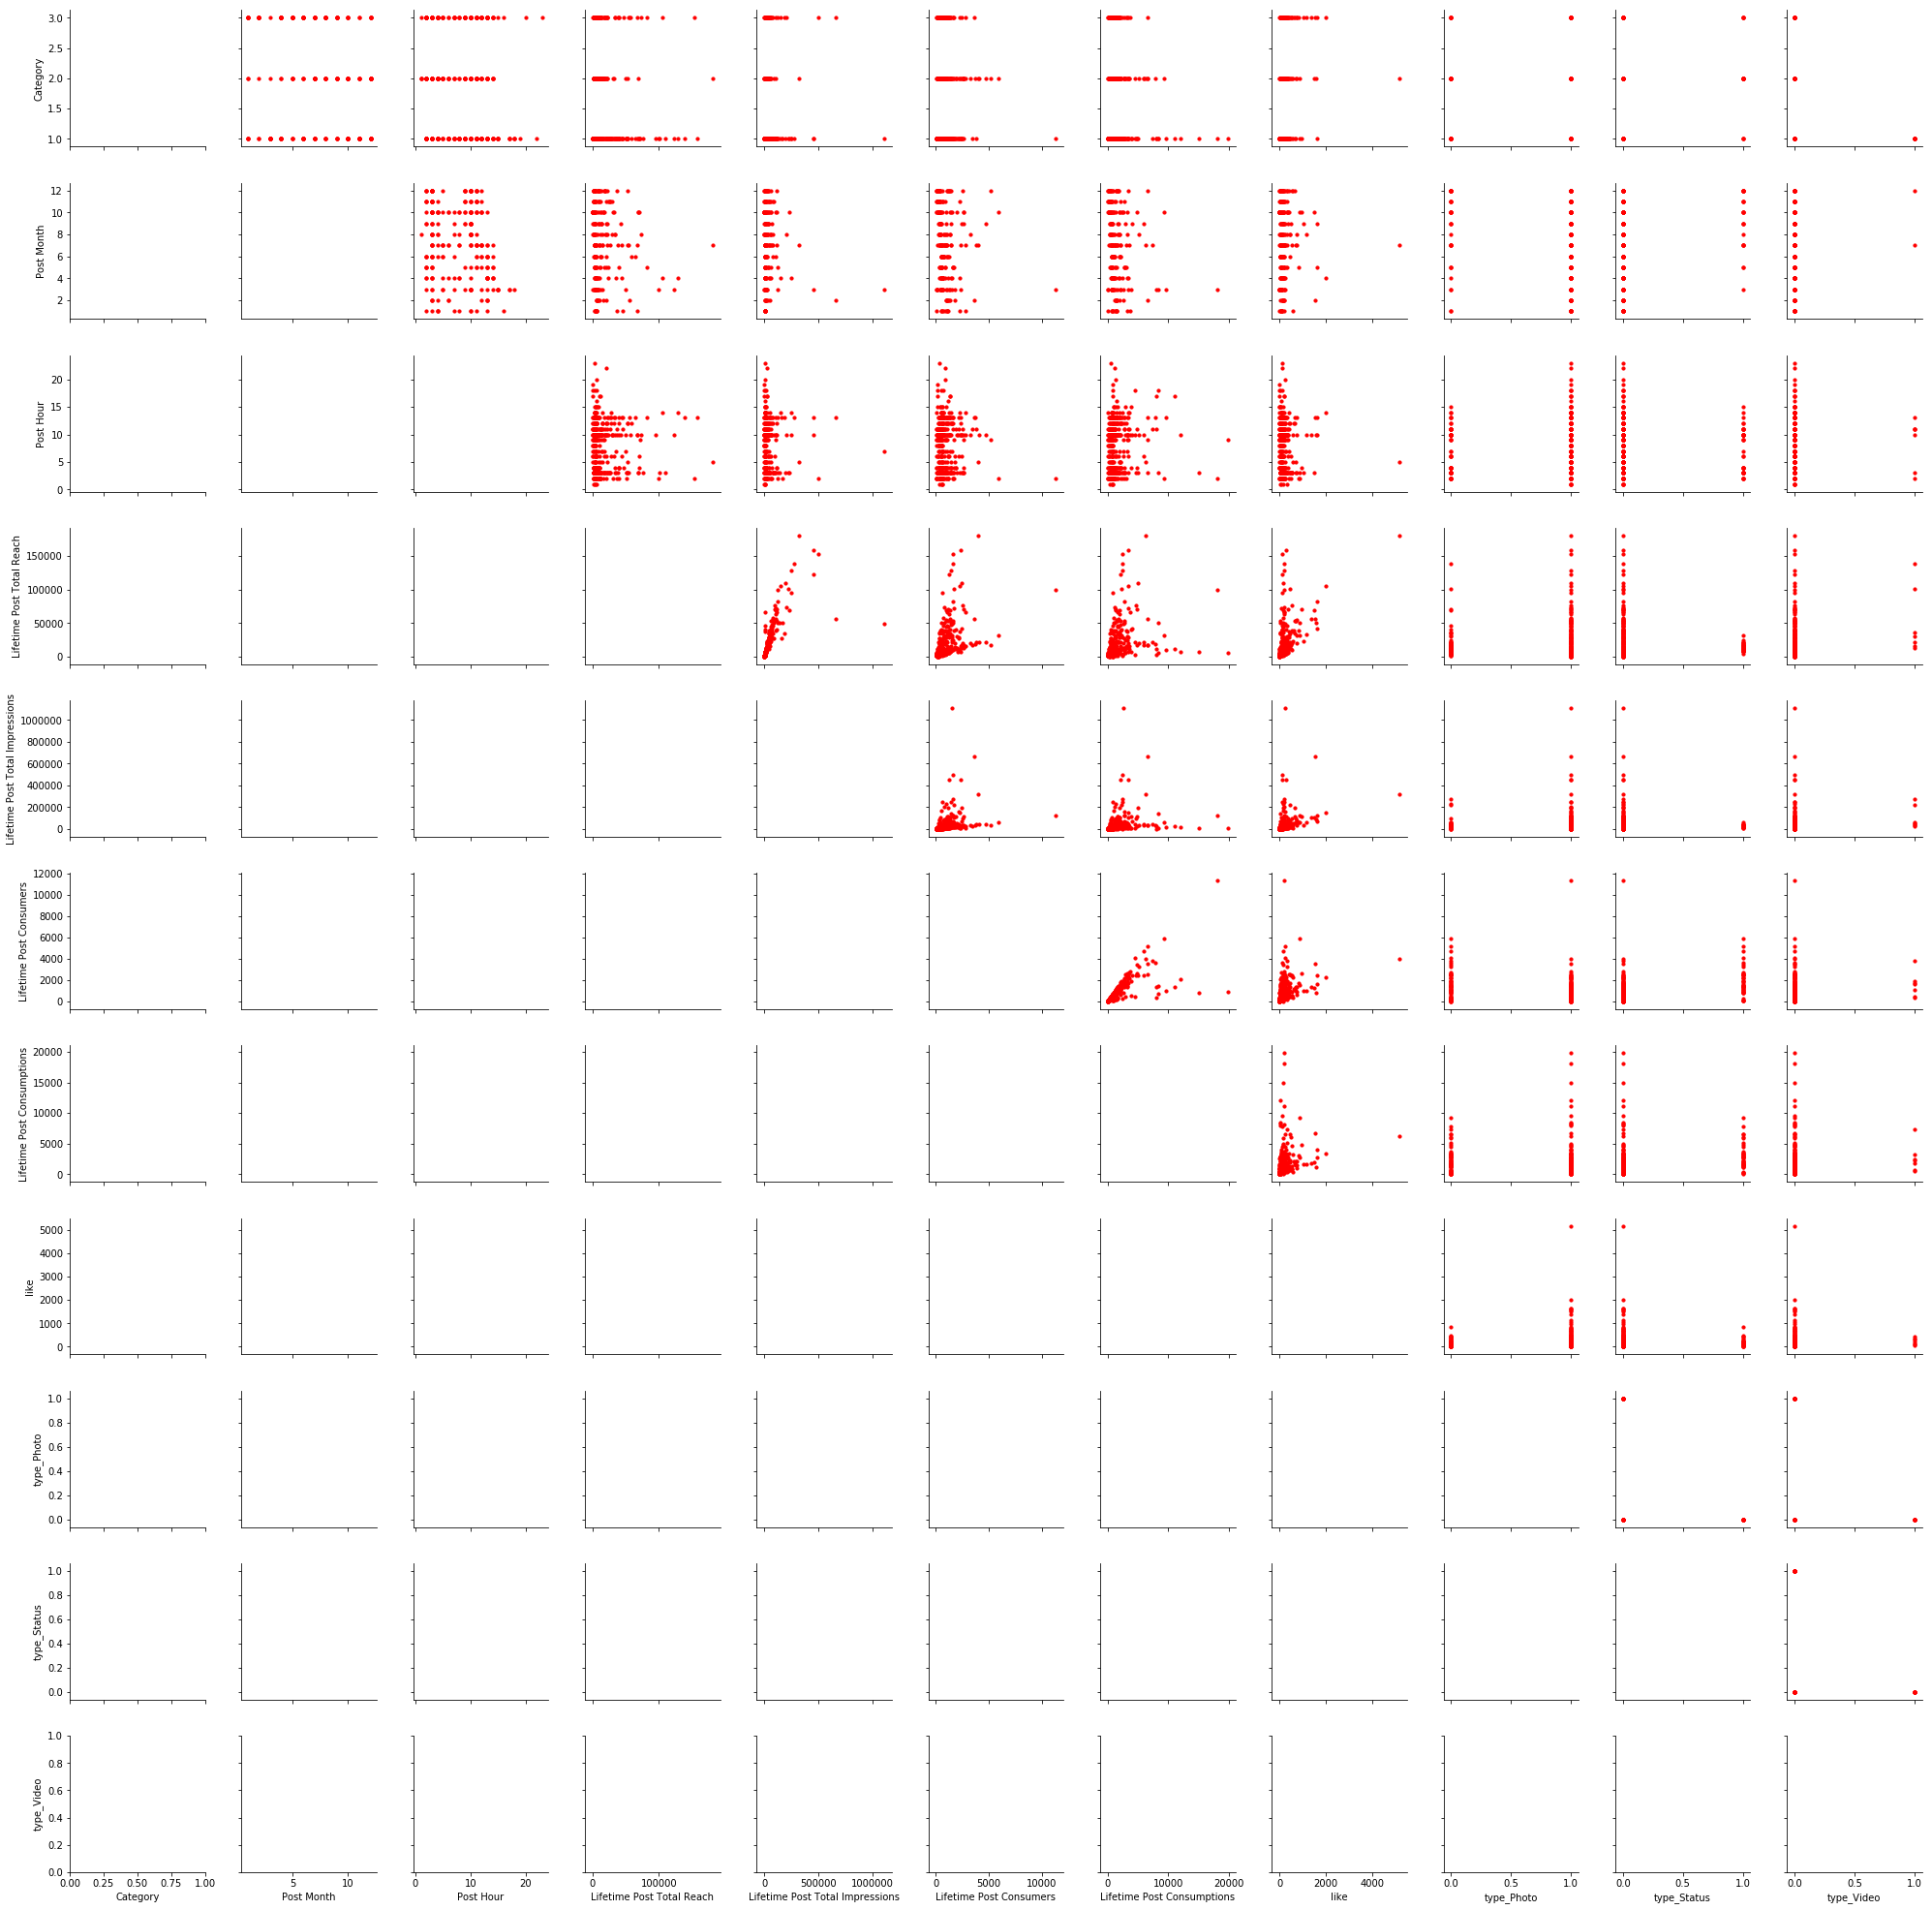

In [23]:
# Now create pairwise plots to see if any other features should be removed
create_pairwise_plots(imputational_model)

From the above we see a somewhat strong covariance between Lifetime Post Total Reach and Lifetime Post Total Impressions. We will remove Lifetime Post Total Reach as it has a lower correlation with the target.<br>
We believe that the other features do not have strong enough covariance with each other to warrant removal.

In [24]:
drop_list=['Lifetime Post Total Reach']
imputational_model = imputational_model.drop(columns=drop_list)

In [25]:
top_correlated=imputational_model.corr()['Post Month'].abs().sort_values(ascending=False)
print(top_correlated)

Post Month                         1.000000
Lifetime Post Consumptions         0.220316
Post Hour                          0.206292
type_Photo                         0.205163
type_Status                        0.195747
Lifetime Post Consumers            0.163687
Category                           0.156799
Lifetime Post Total Impressions    0.121796
type_Video                         0.057530
like                               0.003317
Name: Post Month, dtype: float64


In [26]:
# To avoid problems due to lack of training instances we will restrict ourselves to using only the top 5 features
impute_list = ['Post Month','type_Status','type_Photo','Lifetime Post Consumptions','Category','Lifetime Post Consumers']
imputational_model = imputational_model[impute_list]

## Apply PCA to Full Imputation Feature Set

In [27]:
# Now separate the imputation target from the rest of the features
Y = imputational_model['Post Month'].values
X = imputational_model.drop(columns='Post Month').values
print(Y.shape)
print(X.shape)

(500,)
(500, 5)


In [28]:
# First Scale the feature matrix
X = StandardScaler().fit_transform(X)

In [29]:
#apply PCA to complete dataframe to visualize high dimensional features in low dimensions
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
#now find eigenvalues and eigen vectors.Might be time consuming since we have high dimensional matrix.
# It is absolutely essential we remove feature redundancies before this
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00200401 -0.75606469  0.22447885  0.05261249  0.41132131]
 [-0.75606469  1.00200401 -0.1396632   0.10679851 -0.29543713]
 [ 0.22447885 -0.1396632   1.00200401 -0.1497425   0.708082  ]
 [ 0.05261249  0.10679851 -0.1497425   1.00200401 -0.03123402]
 [ 0.41132131 -0.29543713  0.708082   -0.03123402  1.00200401]]
Eigenvectors 
[[ 0.5288033  -0.44767187  0.01525111  0.72080462  0.0128481 ]
 [-0.48691306  0.49367556  0.23304434  0.65554944  0.187471  ]
 [ 0.44498179  0.57756675  0.12916939  0.0414833  -0.67082208]
 [-0.08335627 -0.29057816  0.93377928 -0.13668405 -0.13412604]
 [ 0.5275658   0.37128874  0.2383889  -0.17404665  0.70476769]]

Eigenvalues 
[2.28913714 1.23916032 1.00082942 0.21801063 0.26288253]


In [30]:
#Also check if the correlation matrix gives the same set of eigen vectors
cor_mat1 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#Confirm that both approaches gives you the same result

Eigenvectors 
[[ 0.5288033  -0.44767187  0.01525111  0.72080462  0.0128481 ]
 [-0.48691306  0.49367556  0.23304434  0.65554944  0.187471  ]
 [ 0.44498179  0.57756675  0.12916939  0.0414833  -0.67082208]
 [-0.08335627 -0.29057816  0.93377928 -0.13668405 -0.13412604]
 [ 0.5275658   0.37128874  0.2383889  -0.17404665  0.70476769]]

Eigenvalues 
[2.28455887 1.236682   0.99882776 0.21757461 0.26235676]


In [31]:
# Now isolate the features which are your principal components
# The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
# In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top 𝑘 eigenvectors.
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.2845588683139475
1.2366819986815396
0.9988277626045059
0.2623567629357316
0.21757460746427384


In [32]:
#the next question is "how many principal components are we going to choose for our new feature subspace?" 
# A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. 
# The explained variance tells us how much information (variance) can be attributed to each of the principal components.
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
num_eig_pairs = len(eig_pairs)+1

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,num_eig_pairs)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,num_eig_pairs)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='exploratory-vis-histogram')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bmoore49/0 or inside your plot.ly account where it is named 'exploratory-vis-histogram'


In [33]:
#From the above we have chosen to keep PC1, PC2, PC3, PC4
# This combination explains 95.6% of the variance

eigenvector_length = X.shape[1]

matrix_w = np.hstack((eig_pairs[0][1].reshape(eigenvector_length,1), 
                      eig_pairs[1][1].reshape(eigenvector_length,1),
                      eig_pairs[2][1].reshape(eigenvector_length,1),
                      eig_pairs[3][1].reshape(eigenvector_length,1),
                     ))

print('Projection matrix W:\n', matrix_w)

Projection matrix W:
 [[ 0.5288033  -0.44767187  0.01525111  0.0128481 ]
 [-0.48691306  0.49367556  0.23304434  0.187471  ]
 [ 0.44498179  0.57756675  0.12916939 -0.67082208]
 [-0.08335627 -0.29057816  0.93377928 -0.13412604]
 [ 0.5275658   0.37128874  0.2383889   0.70476769]]


In [34]:
# We now project our feature matrix into this new space
X_proj = X.dot(matrix_w)
print(X_proj.shape)

(500, 4)


In [35]:
# Now create test and train datasets
# Note we chose to make the test size the same percentage (50.0%) as the amount of missing data we have
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(X_proj, Y, test_size = 0.50, random_state=42)

## Apply PCA to Imputation Features With Rows to Be Imputed Removed

In [36]:
# For experimenting on which imputation technique is most effective we want to know the actual label for each row
# We thus remove all data which is actually missing from garagetotalsqft
imputational_model_cleaned = imputational_model.dropna()

In [37]:
# Now separate the imputation target from the rest of the features
Y = imputational_model_cleaned['Post Month'].values
X = imputational_model_cleaned.drop(columns='Post Month').values
print(Y.shape)
print(X.shape)

(250,)
(250, 5)


In [38]:
# First Scale the feature matrix
X = StandardScaler().fit_transform(X)

In [39]:
#apply PCA to complete dataframe to visualize high dimensional features in low dimensions
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
#now find eigenvalues and eigen vectors.Might be time consuming since we have high dimensional matrix.
# It is absolutely essential we remove feature redundancies before this
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00401606e+00 -7.66829936e-01  2.58277301e-01  5.04985573e-02
   3.84445101e-01]
 [-7.66829936e-01  1.00401606e+00 -1.69112604e-01  1.27587333e-01
  -2.69867537e-01]
 [ 2.58277301e-01 -1.69112604e-01  1.00401606e+00 -9.47197373e-02
   8.87512822e-01]
 [ 5.04985573e-02  1.27587333e-01 -9.47197373e-02  1.00401606e+00
  -7.94190536e-04]
 [ 3.84445101e-01 -2.69867537e-01  8.87512822e-01 -7.94190536e-04
   1.00401606e+00]]
Eigenvectors 
[[-0.49295139  0.48036506  0.13874962  0.7066458  -0.08745622]
 [ 0.44766767 -0.56867919  0.09154362  0.6836175   0.02201172]
 [-0.50301126 -0.51957213 -0.02939424 -0.0768009  -0.68575657]
 [ 0.05813725  0.00425656  0.98230044 -0.16382887 -0.06962682]
 [-0.54789808 -0.41938058  0.08117965 -0.02409465  0.71885808]]

Eigenvalues 
[2.38529273 1.29727777 1.02580798 0.20928908 0.10241277]


In [40]:
#Also check if the correlation matrix gives the same set of eigen vectors
cor_mat1 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#Confirm that both approaches gives you the same result

Eigenvectors 
[[-0.49295139  0.48036506  0.13874962  0.7066458  -0.08745622]
 [ 0.44766767 -0.56867919  0.09154362  0.6836175   0.02201172]
 [-0.50301126 -0.51957213 -0.02939424 -0.0768009  -0.68575657]
 [ 0.05813725  0.00425656  0.98230044 -0.16382887 -0.06962682]
 [-0.54789808 -0.41938058  0.08117965 -0.02409465  0.71885808]]

Eigenvalues 
[2.37575156 1.29208866 1.02170474 0.20845192 0.10200312]


They both give the same eigenvalues and eigenvectors, so everything looks fine.

In [41]:
# Now isolate the features which are your principal components
# The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
# In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top 𝑘 eigenvectors.
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.375751557577928
1.2920886581273354
1.0217047449836063
0.20845192173914473
0.1020031175719828


In [42]:
#the next question is "how many principal components are we going to choose for our new feature subspace?" 
# A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. 
# The explained variance tells us how much information (variance) can be attributed to each of the principal components.
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
num_eig_pairs = len(eig_pairs)+1

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,num_eig_pairs)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,num_eig_pairs)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='exploratory-vis-histogram')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bmoore49/0 or inside your plot.ly account where it is named 'exploratory-vis-histogram'


In [43]:
#From the above we have chosen to keep PC1, PC2, PC3, PC4
# This combination explains 96.6% of the variance

eigenvector_length = X.shape[1]
# print(eig_pairs)

matrix_w = np.hstack((eig_pairs[0][1].reshape(eigenvector_length,1), 
                      eig_pairs[1][1].reshape(eigenvector_length,1),
                      eig_pairs[2][1].reshape(eigenvector_length,1),
                      eig_pairs[3][1].reshape(eigenvector_length,1),
                     ))

print('Projection matrix W:\n', matrix_w)

Projection matrix W:
 [[-0.49295139  0.48036506  0.13874962  0.7066458 ]
 [ 0.44766767 -0.56867919  0.09154362  0.6836175 ]
 [-0.50301126 -0.51957213 -0.02939424 -0.0768009 ]
 [ 0.05813725  0.00425656  0.98230044 -0.16382887]
 [-0.54789808 -0.41938058  0.08117965 -0.02409465]]


In [44]:
# We now project our feature matrix into this new space
X_proj = X.dot(matrix_w)
print(X_proj.shape)

(250, 4)


In [45]:
# Now create test and train datasets
# Note we chose to make the test size 50.0%
X_train_clnd, X_test_clnd, Y_train_clnd, Y_test_clnd = train_test_split(X_proj, Y, test_size = 0.50, random_state=42)

## Experiment 1 - Mean Imputation

In [46]:
# We now see what results we get for just replacing all missing values with mean of remaining part of dataset

# Calculate average value from train set
mean_Y = np.mean(Y_train_clnd)
# Place this value in the predicted test set
Y_test_pred = [mean_Y for elem in Y_test_clnd]

# Calculate the MSE and r^2 value for Mean Imputation
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test_clnd, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test_clnd,Y_test_pred))

The mean squared error of this prediction is 11.600448
The r^2 value for this prediction is -0.002439


In [47]:
# Now use this to fill in actual data in the main model and use polynomial regression
# to make a prediction on the actual target (taxvaluedollarcnt)

# Make copy of imputational model
imputational_model_meanImp = imputational_model.copy(deep=True)

# Apply mean imputation to fill out missing values
imputational_model_meanImp['Post Month'].fillna((imputational_model_meanImp['Post Month'].mean()), inplace=True)

Y_full = imputational_model_meanImp['Post Month'].values

In [48]:
# We now make copy of the full model dataframe and drop all nan vaues from other features
df_model_Mean = df_orig[model_list]

# We now replace the Post Month in the above dataframe with the imputed one we just calculated
df_model_Mean = df_model_Mean.drop(columns='Post Month')
df_model_Mean['Post Month'] = Y_full

nan_investigation(df_model_Mean)

,Page total likes,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,Post Month
Tot_Null,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0


## Experiment 2 - Expectation Maximization

In [49]:
from sklearn.mixture import GaussianMixture

In [50]:
# # Now use GridSearchCV to choose best model based on hyperparamters

# param_grid = {'n_components': [3, 5, 9, 15, 29, 45],
#               'max_iter': [10, 100, 1000, 10000, 100000, 1000000]}

# gmm = GaussianMixture()

# gmm_cv = GridSearchCV(gmm, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs = -1, verbose = 2)
# gmm_cv.fit(X_train_clnd, Y_train_clnd)

# print("Best Score (r^2 value): %f" % gmm_cv.best_score_)
# print("Optimal Hyperparameter Values: ", gmm_cv.best_params_)

In [51]:
# Below are the optimal hyperparameters
max_iter_opt = 100
n_components_opt = 9

In [52]:
# Implement Gausian Mixture Model
gmm = GaussianMixture(n_components=n_components_opt, max_iter=max_iter_opt).fit(X_train_clnd)
# These are the predictions for each row as to what class it is in
prediction_gmm = gmm.predict(X_train_clnd)


unique_classes = np.unique(prediction_gmm)
print(unique_classes)
mean_val = np.zeros(len(unique_classes))
for unique_class in unique_classes:
    mean_val[unique_class] = np.mean([Y_train_clnd[index] for index in range(len(Y_train_clnd)) if prediction_gmm[index]==unique_class])
# mean_val now holds the mean value for each clas

[0 1 2 3 4 5 6 7 8]


In [53]:
# Now make a prediction on the test set

Y_test_pred = gmm.predict(X_test_clnd)

# Go through and replace each predicted class with its associated mean class value
for row in range(len(Y_test_pred)):
        Y_test_pred[row] = mean_val[ prediction_gmm[row] ]

print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test_clnd, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test_clnd,Y_test_pred))

The mean squared error of this prediction is 15.576000
The r^2 value for this prediction is -0.345982


In [54]:
# Now use this to fill in actual data in the main model and use polynomial regression
# to make a prediction on the actual target (taxvaluedollarcnt)

# Create dataframe with all rows not missing any values for imputation target
data_present_df = imputational_model[pd.notnull(imputational_model['Post Month'])]

# Pull out full target Vector and full feature matrix
Y_full = imputational_model['Post Month'].values
X_full = imputational_model.drop(columns='Post Month').values

# Now create target and feature arrays for both cases
Y_present = data_present_df['Post Month'].values
X_present = data_present_df.drop(columns='Post Month').values



gmm = GaussianMixture(n_components=n_components_opt, max_iter=max_iter_opt).fit(X_present)
gmm.fit(X_present)

# Create class predictions for data present
prediction_gmm = gmm.predict(X_present)

# Come up with mean value for each class corresponding to above grouping
unique_classes = np.unique(prediction_gmm)
mean_val = np.zeros(len(unique_classes))
for unique_class in unique_classes:
    mean_val[unique_class] = np.mean([Y_present[index] for index in range(len(Y_present)) if prediction_gmm[index]==unique_class])

# Now make class predictions for values we do not know
prediction_gmm = gmm.predict(X_full)

# Go through each actual and replace any missing values with those corresponding to their predictions
for row in range(len(Y_full)):
    if math.isnan(Y_full[row]):
        Y_full[row] = mean_val[ prediction_gmm[row] ]

In [55]:
# We now make copy of the full model dataframe and drop all nan vaues from other features
df_model_EM = df_orig[model_list]

# We now replace the Post Month in the above dataframe with the imputed one we just calculated
df_model_EM = df_model_EM.drop(columns='Post Month')
df_model_EM['Post Month'] = Y_full

nan_investigation(df_model_EM)

,Page total likes,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,Post Month
Tot_Null,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0


## Experiment 3 - KNN Imputation

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [56]:
# # Now use GridSearchCV to choose best model based on hyperparamters

# param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 39, 43, 49],
#               'p': [1, 2, 3, 5, 10, 100, 200, 300],'weights': ["uniform", "distance"]}

# knn = KNeighborsRegressor()

# knn_cv = GridSearchCV(knn, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs = -1, verbose = 2)
# knn_cv.fit(X_train_clnd, Y_train_clnd)

# print("Best Score (r^2 value): %f" % knn_cv.best_score_)
# print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

The above results give the following optimal values:<br>
optimal r^2 value: 0.832346<br>
n_neighbors: 35<br>
p: 2<br>
weights: distance

In [57]:
# Now train model using the above-found optimal hyper-parameters

# Using best hyperparameter values found above we find the optimum model
n_neighbors_opt = 35
p_opt = 2
weights_opt = 'distance'

knn_cv = KNeighborsRegressor(n_neighbors=n_neighbors_opt, p=p_opt,weights=weights_opt)
knn_cv.fit(X_train_clnd, Y_train_clnd)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=35, p=2,
          weights='distance')

In [58]:
# Predict missing values in X_test
Y_test_pred = knn_cv.predict(X_test_clnd)

print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test_clnd, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test_clnd,Y_test_pred))

The mean squared error of this prediction is 7.668604
The r^2 value for this prediction is 0.337327


In [59]:
# Now use this to fill in actual data in the main model and use polynomial regression
# to make a prediction on the actual target (taxvaluedollarcnt)

# Create dataframe with all rows not missing any values for imputation target
data_present_df = imputational_model[pd.notnull(imputational_model['Post Month'])]

# Pull out full target Vector and full feature matrix
Y_full = imputational_model['Post Month'].values
X_full = imputational_model.drop(columns='Post Month').values

# Now create target and feature arrays for both cases
Y_present = data_present_df['Post Month'].values
X_present = data_present_df.drop(columns='Post Month').values

# Using above-found hyperparameters we fit our data, using the 
knn_cv = KNeighborsRegressor(n_neighbors=n_neighbors_opt, p=p_opt,weights=weights_opt)
knn_cv.fit(X_present, Y_present)

# Now make a prediction for the missing values in the imputation target
Y_full_pred = knn_cv.predict(X_full)

# Now replace missing values in Y_full with their predicted values
# Y_full = [elem for elem in Y_full_pred if math.isnan(Y_full)]
for row in range(len(Y_full)):
    if math.isnan(Y_full[row]):
        Y_full[row] = Y_full_pred[row]

In [60]:
# We now make copy of the full model dataframe and drop all nan vaues from other features
df_model_KNN = df_orig[model_list]

# We now replace the Post Month in the above dataframe with the imputed one we just calculated
df_model_KNN = df_model_KNN.drop(columns='Post Month')
df_model_KNN['Post Month'] = Y_full

nan_investigation(df_model_KNN)

,Page total likes,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,Post Month
Tot_Null,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0


## Experiment 4 - Polynomial Regression

In [61]:
def vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test):
    mse_train, mse_test = [], []

    for degree in degreeList:
        print('Modeling data using degree: %i' %degree)

        # Create model for current degree polynomial being considered
        model = make_pipeline(PolynomialFeatures(degree, include_bias=False),
                              StandardScaler(), LinearRegression()) 

        # Fit model using the training data for current degree of polynomial
        model.fit(X_train, Y_train)

        # Make prediction for both training and testing datasets
        Y_train_predicted = model.predict(X_train)
        Y_test_predicted = model.predict(X_test)

        # These keep track of MSE for testing and training datasets for each polynomial order considered
        mse_train.append(mean_squared_error(Y_train, Y_train_predicted))
        mse_test.append(mean_squared_error(Y_test, Y_test_predicted))

    # Below plots the “rmse vs. degree”
    plt.figure(figsize=(10, 6))
    plt.plot(degreeList, mse_test, "ro-", alpha=1.0, linewidth=1.0, label="Test MSE")
    plt.plot(degreeList, mse_train, "bo-", alpha=1.0, linewidth=1.0, label="Train MSE")    
    plt.legend(loc="best", fontsize=14) 
    plt.xlabel("Degree")
    plt.ylabel("MSE")
    plt.title("MSE for Varying Degree")
#     plt.ylim(bottom = 0, top=40000) # Adjust the y range to better understand which order of polynomial really becomes a problem
    plt.show()

Modeling data using degree: 1
Modeling data using degree: 2


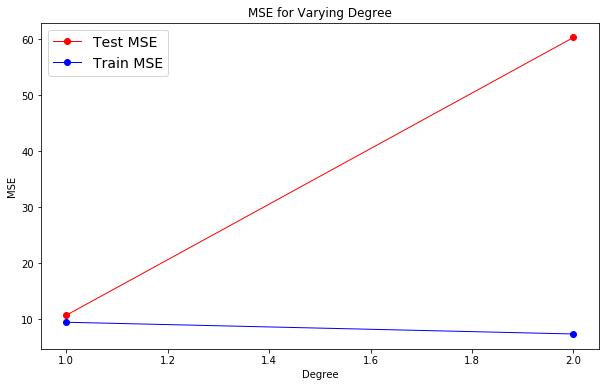

In [62]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train_clnd,Y_train_clnd,X_test_clnd,Y_test_clnd)

In [63]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly_clnd = poly_features.fit_transform(X_train_clnd)

scaler = StandardScaler().fit(X_train_poly_clnd)
X_train_poly_standardized_clnd = scaler.transform(X_train_poly_clnd)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [64]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train_clnd, Y_train_clnd)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

From the above we will use the following hyperparameters for linear regression:<br>
 alpha_opt = 0.001 # Regularization Parameter<br>
 learning_rate_opt = 'optimal' # (constant or updated during descent)<br>
 l1_ratio_opt = 0.2<br>
 max_iter_opt = 400<br>
 eta0_opt = 0.001 # learning rate<br>
 penalty_opt = 'elasticnet'

In [65]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.001 # Regularization Parameter
learning_rate_opt = 'optimal' # (constant or updated during descent)
l1_ratio_opt = 0.2
max_iter_opt = 400
eta0_opt = 0.001 # learning rate
penalty_opt = 'elasticnet'

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train_clnd, Y_train_clnd)

Y_test_pred = lin_reg_sgd.predict(X_test_clnd)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test_clnd, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test_clnd,Y_test_pred))

The mean squared error of this prediction is 10.784587
The r^2 value for this prediction is 0.068063


In [66]:
# Now use this to fill in actual data in the main model and use polynomial regression
# to make a prediction on the actual target (taxvaluedollarcnt)

# Create dataframe with all rows not missing any values for imputation target
data_present_df = imputational_model[pd.notnull(imputational_model['Post Month'])]

# Pull out full target Vector and full feature matrix
Y_full = imputational_model['Post Month'].values
X_full = imputational_model.drop(columns='Post Month').values

# Now create target and feature arrays for both cases
Y_present = data_present_df['Post Month'].values
X_present = data_present_df.drop(columns='Post Month').values

# Using above-found hyperparameters we fit our data, using the 
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)
lin_reg_sgd.fit(X_present, Y_present)

# Now make a prediction for the missing values in the imputation target
Y_full_pred = knn_cv.predict(X_full)

# Now replace missing values in Y_full with their predicted values
# Y_full = [elem for elem in Y_full_pred if math.isnan(Y_full)]
for row in range(len(Y_full)):
    if math.isnan(Y_full[row]):
        Y_full[row] = Y_full_pred[row]

In [67]:
# We now make copy of the full model dataframe and drop all nan vaues from other features
df_model_linReg = df_orig[model_list]

# We now replace the Post Month in the above dataframe with the imputed one we just calculated
df_model_linReg = df_model_linReg.drop(columns='Post Month')
df_model_linReg['Post Month'] = Y_full

nan_investigation(df_model_linReg)

,Page total likes,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,Post Month
Tot_Null,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0


## Experiment 5 - Random Forest

This is a possible improvement on the above polynomial regression imputation approach.<br>
This will select random subsamples of the train data and calculate an optimal regression formula.<br>
To select these we have implemented bootstrapping with replacement, to get a more unbiased opinion from the train data.<br>
Each node of a tree makes a decision, which is then re-evaluated by below branches until a low enough MSE is reached, or the maximum size is reached.<br>
Each tree may also be given a different subselection of features to use.<br>
The final output is then the average of all trees created.

In [68]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

Modeling data using degree: 1
Modeling data using degree: 2


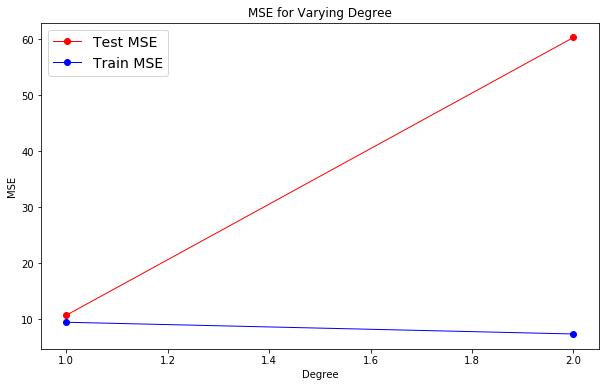

In [69]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train_clnd,Y_train_clnd,X_test_clnd,Y_test_clnd)

In [70]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# It looks like it is very similar up to degree 1, with variations possibly due to noise
# We therefore choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly_clnd = poly_features.fit_transform(X_train_clnd)

scaler = StandardScaler().fit(X_train_poly_clnd)
X_train_poly_standardized_clnd = scaler.transform(X_train_poly_clnd)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [71]:
# # We first set up our hyperparameters we will try for optimizing this regression with Random Forest

# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3, 4],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# # Create a based model
# rf = RandomForestRegressor()

# # Initialize the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_squared_error',
#                           cv = 5, n_jobs = -1, verbose = 2)

# # Fit the grid search to the data
# grid_search.fit(X_train_poly_standardized_clnd, Y_train_clnd)

# # Print the optimal parameters
# grid_search.best_params_

The above shows that the optimal hyperparameters for a linear model are:<br>
bootstrap_opt = True<br>
max_depth_opt = 90<br>
max_features_opt = 2<br>
min_samples_leaf_opt = 3<br>
min_samples_split_opt = 12<br>
n_estimators_opt = 100

In [72]:
# Instantiate model with above-indicated hyperparameters
bootstrap_opt = True
max_depth_opt = 90
max_features_opt = 2
min_samples_leaf_opt = 3
min_samples_split_opt = 12
n_estimators_opt = 100

random_forest = RandomForestRegressor(bootstrap=bootstrap_opt, max_depth=max_depth_opt,
                                      max_features=max_features_opt, min_samples_leaf=min_samples_leaf_opt,
                                      min_samples_split=min_samples_split_opt, n_estimators=n_estimators_opt,
                                      random_state = 42)

# Train the model on training data
random_forest.fit(X_train_clnd, Y_train_clnd);

In [73]:
# Use the forest's predict method on the test data
Y_test_pred = random_forest.predict(X_test_clnd)

print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test_clnd, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test_clnd,Y_test_pred))

The mean squared error of this prediction is 7.052163
The r^2 value for this prediction is 0.390596


In [74]:
# Now use this to fill in actual data in the main model and use polynomial regression
# to make a prediction on the actual target (taxvaluedollarcnt)

# Create dataframe with all rows not missing any values for imputation target
data_present_df = imputational_model[pd.notnull(imputational_model['Post Month'])]

# Pull out full target Vector and full feature matrix
Y_full = imputational_model['Post Month'].values
X_full = imputational_model.drop(columns='Post Month').values

# Now create target and feature arrays for both cases
Y_present = data_present_df['Post Month'].values
X_present = data_present_df.drop(columns='Post Month').values

# Using above-found hyperparameters we fit our data, using the 
random_forest = RandomForestRegressor(bootstrap=bootstrap_opt, max_depth=max_depth_opt,
                                      max_features=max_features_opt, min_samples_leaf=min_samples_leaf_opt,
                                      min_samples_split=min_samples_split_opt, n_estimators=n_estimators_opt,
                                      random_state = 42)
random_forest.fit(X_present, Y_present);

# Now make a prediction for the missing values in the imputation target
Y_full_pred = random_forest.predict(X_full)

# Now replace missing values in Y_full with their predicted values
# Y_full = [elem for elem in Y_full_pred if math.isnan(Y_full)]
for row in range(len(Y_full)):
    if math.isnan(Y_full[row]):
        Y_full[row] = Y_full_pred[row]

In [75]:
# We now make copy of the full model dataframe and drop all nan vaues from other features
df_model_randForest = df_orig[model_list]

# We now replace the Post Month in the above dataframe with the imputed one we just calculated
df_model_randForest = df_model_randForest.drop(columns='Post Month')
df_model_randForest['Post Month'] = Y_full

nan_investigation(df_model_randForest)

,Page total likes,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,Post Month
Tot_Null,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0


## Experiment 6 - Artificial Neural Network

In [76]:
#what if we used a dense neural network instead
# Define Feature Columns for the Linear Regressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [77]:
# define our model,one hidden layer with one output layer
def base_architecture_1hidden(num_neurons_layer1, X_train_clnd):
    #create model
    model=Sequential()
    #the input layer
    model.add(Dense(X_train_clnd.shape[1], input_dim=X_train_clnd.shape[1],
                    kernel_initializer='normal', activation='relu'))
    # The Hidden Layers :
    model.add(Dense(int(num_neurons_layer1), kernel_initializer='normal',activation='relu'))
    # the Output Layers:
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile the network :
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [78]:
# define our model,two densely connected layers with one output layer
def base_architecture_2hidden(num_neurons_layer1,num_neurons_layer2,X_train_clnd):
    #create model
    model=Sequential()
    #the input layer
    model.add(Dense(X_train_clnd.shape[1], input_dim=X_train_clnd.shape[1],
                    kernel_initializer='normal', activation='relu'))
    # The Hidden Layers :
    model.add(Dense(int(num_neurons_layer1), kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_neurons_layer2), kernel_initializer='normal',activation='relu'))
    # the Output Layers:
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile the network :
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [79]:
# define our model,three densely connected layers with one output layer
def base_architecture_3hidden(num_neurons_layer1,num_neurons_layer2,num_neurons_layer3,X_train_clnd):
    #create model
    model=Sequential()
    #the input layer
    model.add(Dense(X_train_clnd.shape[1], input_dim=X_train_clnd.shape[1],
                    kernel_initializer='normal', activation='relu'))
    # The Hidden Layers :
    model.add(Dense(int(num_neurons_layer1), kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_neurons_layer2), kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_neurons_layer3), kernel_initializer='normal',activation='relu'))
    # the Output Layers:
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile the network :
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [80]:
# define our model,three densely connected layers with one output layer
def base_architecture_4hidden(num_neurons_layer1,num_neurons_layer2,num_neurons_layer3,
                              num_neurons_layer4,X_train_clnd):
    #create model
    model=Sequential()
    #the input layer
    model.add(Dense(X_train_clnd.shape[1], input_dim=X_train_clnd.shape[1],
                    kernel_initializer='normal', activation='relu'))
    # The Hidden Layers :
    model.add(Dense(int(num_neurons_layer1), kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_neurons_layer2), kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_neurons_layer3), kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_neurons_layer4), kernel_initializer='normal',activation='relu'))
    
    # the Output Layers:
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile the network :
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [81]:
# Choose number of neurons for each layer
num_neurons_layer1 = 100
num_neurons_layer2 = 60
num_neurons_layer3 = 30
num_neurons_layer4 = 10

epoch = 10
batch_sizes = 100

Modeling data using 1 hidden layers
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Modeling data using 2 hidden layers
Modeling data using 3 hidden layers


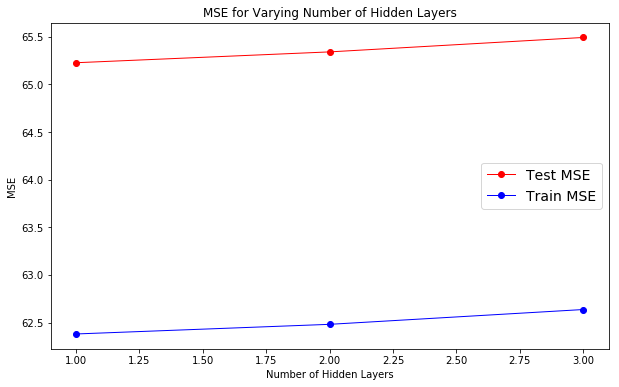

In [82]:
# First go through different numbers of hidden layers, with above conditions, and see if there is a gain in
# including more layers

layerList = [1,2,3]

mse_train, mse_test = [], []

for num_of_layers in layerList:
    print('Modeling data using %i hidden layers' %num_of_layers)
    
    if num_of_layers == 1:
        model = base_architecture_1hidden(num_neurons_layer1,X_train_clnd)
    if num_of_layers == 2:
        model = base_architecture_2hidden(num_neurons_layer1,num_neurons_layer2,X_train_clnd)
    if num_of_layers == 3:
        model = base_architecture_3hidden(num_neurons_layer1,num_neurons_layer2,
                                          num_neurons_layer3,X_train_clnd)
    if num_of_layers == 4:
        model = base_architecture_4hidden(num_neurons_layer1,num_neurons_layer2,
                                          num_neurons_layer3,num_neurons_layer4,
                                          X_train_clnd)
        
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    
    model.fit(X_train_clnd, Y_train_clnd, epochs=epoch, batch_size=batch_sizes, verbose=0)

    # Make prediction for both training and testing datasets
    Y_train_predicted = model.predict(X_train_clnd).flatten()
    Y_test_predicted = model.predict(X_test_clnd).flatten()

    # These keep track of MSE for testing and training datasets for each polynomial order considered
    mse_train.append(mean_squared_error(Y_train_clnd, Y_train_predicted))
    mse_test.append(mean_squared_error(Y_test_clnd, Y_test_predicted))

# Below plots the “mse vs. degree”
plt.figure(figsize=(10, 6))
plt.plot(layerList, mse_test, "ro-", alpha=1.0, linewidth=1.0, label="Test MSE")
plt.plot(layerList, mse_train, "bo-", alpha=1.0, linewidth=1.0, label="Train MSE")    
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Number of Hidden Layers")
plt.ylabel("MSE")
plt.title("MSE for Varying Number of Hidden Layers")
plt.show()

From the above we choose to use 2 hidden layers

In [83]:
# Choose values to examine for hyperparameter optimization
epoch_list = [10, 50, 100]
batch_sizes = [10, 50, 100]
num_neurons_layer1_list = [100, 200, 500]
num_neurons_layer2_list = [50, 100, 200]

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [84]:
# # We now use k-fold cross-validation to find the optimal hyperparameters
# input_dims = X_train_clnd.shape[1]
# seed = 42
# kfold = KFold(n_splits=6, random_state=seed)
# cvscores=[]
# kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# model_performance_list = np.empty([1,5]) # Initialize as empty
# num_comb = len(epoch_list)*len(batch_sizes)*len(num_neurons_layer1_list)*len(num_neurons_layer2_list)
# count=1
# for epoch in epoch_list:
#     for curr_batch_size in batch_sizes:
#         for num_neurons_l1 in num_neurons_layer1_list:
#             for num_neurons_l2 in num_neurons_layer2_list:
#                 print('Looking at combination %i of %i' %(count,num_comb))
#                 count+=1

#                 model = base_architecture_2hidden(num_neurons_l1,num_neurons_l2,X_train_clnd)
#                 model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

#                 curr_score_list = []
#                 count_fold = 1
#                 for train, test in kfold.split(X_train_clnd, Y_train_clnd):

#                     count_fold += 1

#                     model.fit(X_train_clnd[train], Y_train_clnd[train],
#                                        epochs=epoch, batch_size=curr_batch_size, verbose=0)
#                     scores = model.evaluate(X_train_clnd[test], Y_train_clnd[test], verbose=0)
#                     curr_score_list.append(scores[1])
#                 curr_avg_score = np.mean(curr_score_list)

#                 model_performance_list=np.vstack((model_performance_list,
#                                               [epoch,curr_batch_size,num_neurons_l1,
#                                                num_neurons_l2,curr_avg_score]))
    
# # Remove first row from model_performance_list as it contained the random values used to initialize it
# model_performance_list=np.delete(model_performance_list, [0], axis=0)
# # Save full output of s-fold cross-validation to disk for use in report
# df_s_fold = pd.DataFrame(model_performance_list,
#                          columns=['Epoch', 'Batch Size', 'Number of Neurons-Layer1',
#                                   'Number of Neurons-Layer2','Test MSE'])
# # df_s_fold.to_csv(reposLink + '/' 'df_s_fold-batch_grad.csv')

# print('\n')
# print(df_s_fold)

# # Replace any inf or nan with np.nan for dropping in next step
# df_s_fold=df_s_fold.replace('inf', np.nan)
# df_s_fold=df_s_fold.replace('nan', np.nan)
# # Now drop all rows containing NaN
# df_s_fold=df_s_fold.dropna()
# print('\n')
# print('Below are the values corresponding to the smallest MSE from the testing sets during cross-validation')
# # Now find row index corresponding to lowest MSE from testing sets
# print(df_s_fold[df_s_fold['Test MSE']==df_s_fold['Test MSE'].min()])

Here are the optimal hyperparameters we will use:<br>

Optimal MSE = 8.061209 <br>
epoch = 50 <br>
batch_sizes = 10 <br>
num_neurons_layer1 = 100 <br>
num_neurons_layer2 = 100 <br>

In [85]:
# Below are the chosen hyperparameters
epoch = 50 
batch_sizes = 10 
num_neurons_layer1 = 100 
num_neurons_layer2 = 100 

In [86]:
# Now fit the model with the optimal hyperparameters
model = base_architecture_2hidden(num_neurons_layer1,num_neurons_layer2,X_train_clnd)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X_train_clnd, Y_train_clnd, epochs=epoch, batch_size=batch_sizes, verbose=0)

In [87]:
Y_test_pred = model.predict(X_test_clnd).flatten()

print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test_clnd, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test_clnd,Y_test_pred))

The mean squared error of this prediction is 7.830852
The r^2 value for this prediction is 0.323306


In [88]:
# Now use this to fill in actual data in the main model and use polynomial regression
# to make a prediction on the actual target (taxvaluedollarcnt)

# Create dataframe with all rows not missing any values for imputation target
data_present_df = imputational_model[pd.notnull(imputational_model['Post Month'])]

# Pull out full target Vector and full feature matrix
Y_full = imputational_model['Post Month'].values
X_full = imputational_model.drop(columns='Post Month').values

# Now create target and feature arrays for both cases
Y_present = data_present_df['Post Month'].values
X_present = data_present_df.drop(columns='Post Month').values

# Using above-found hyperparameters we fit our data, using the 
model = base_architecture_2hidden(num_neurons_layer1,num_neurons_layer2,X_present)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(X_present, Y_present, epochs=epoch, batch_size=batch_sizes, verbose=0)

# Now make a prediction for the missing values in the imputation target
Y_full_pred = model.predict(X_full)

# Now replace missing values in Y_full with their predicted values
for row in range(len(Y_full)):
    if math.isnan(Y_full[row]):
        Y_full[row] = Y_full_pred[row]

In [89]:
# We now make copy of the full model dataframe and drop all nan vaues from other features
df_model_ANN = df_orig[model_list]

# We now replace the Post Month in the above dataframe with the imputed one we just calculated
df_model_ANN = df_model_ANN.drop(columns='Post Month')
df_model_ANN['Post Month'] = Y_full

nan_investigation(df_model_ANN)

,Page total likes,type_Status,Lifetime Post Consumers,Post Hour,Lifetime Post Consumptions,Post Month
Tot_Null,0,0,0,0,0,0
Tot_Not_Null,500,500,500,500,500,500
Perc_Null,0,0,0,0,0,0


## Making Predictions On Actual Target Without Using Imputed Feature

In [90]:
# First we use the actual data without imputation, just removing missing values, to see how well that does

df_model_noImput = df_orig[model_list] # Includes all features, including target
# Now drop any rows missing any values
df_model_noImput.dropna(axis=0, how='any', thresh=None, inplace=True)

Y = df_model_noImput['Post Month'].values
X = df_model_noImput.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

With this model we now investigate the use of polynomial regression to make a prediction on the target

Modeling data using degree: 1
Modeling data using degree: 2


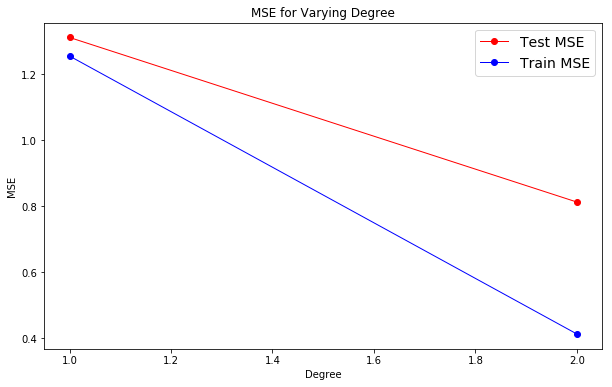

In [91]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

In [92]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 2nd order
poly_degree = 2

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [93]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.01 # Regularization Parameter<br>
learning_rate_opt = 'constant' # (constant or updated during descent)<br>
l1_ratio_opt = 1<br>
max_iter_opt = 1000<br>
eta0_opt = 0.001 # learning rate<br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [94]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.01 # Regularization Parameter
learning_rate_opt = 'constant' # (constant or updated during descent)
l1_ratio_opt = 1
max_iter_opt = 1000
eta0_opt = 0.001 # learning rate
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 0.563023
The r^2 value for this prediction is 0.952158


## Make Predictions on Target Using Imputed Values From Mean Imputation

In [95]:
# Create Feature and Target Arrays

Y = df_model_Mean['Post Month'].values
X = df_model_Mean.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Modeling data using degree: 1
Modeling data using degree: 2
Modeling data using degree: 3


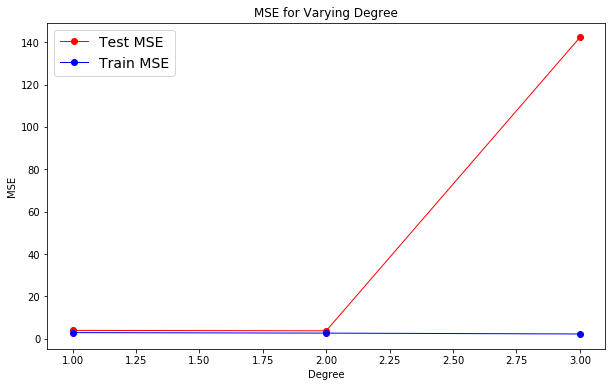

In [96]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2,3]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

In [97]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [98]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.01 # Regularization Parameter<br>
eta0_opt = 0.001 # learning rate<br>
l1_ratio_opt = 0.2<br>
learning_rate_opt = 'optimal' # (constant or updated during descent)<br>
max_iter_opt = 100<br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [99]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.01 # Regularization Parameter
eta0_opt = 0.001 # learning rate
l1_ratio_opt = 0.2
learning_rate_opt = 'optimal' # (constant or updated during descent)
max_iter_opt = 100
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 3.872657
The r^2 value for this prediction is 0.425182


## Make Predictions on Target Using Imputed Values From Expectation Maximization

In [100]:
# Create Feature and Target Arrays

Y = df_model_EM['Post Month'].values
X = df_model_EM.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Modeling data using degree: 1
Modeling data using degree: 2
Modeling data using degree: 3


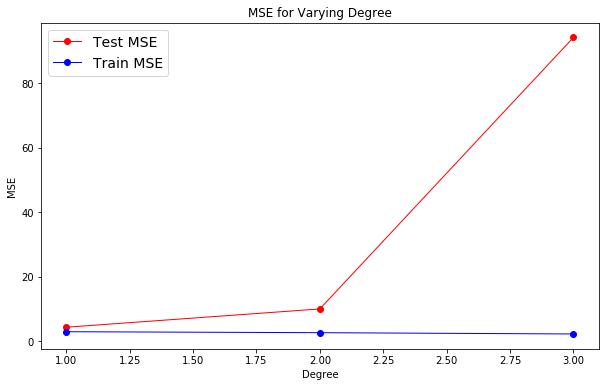

In [101]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2,3]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

In [102]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [103]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.01 # Regularization Parameter<br>
eta0_opt = 0.01 # learning rate<br>
l1_ratio_opt = 0.2 <br>
learning_rate_opt = 'constant' # (constant or updated during descent)<br>
max_iter_opt = 1000 <br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [104]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.01 # Regularization Parameter
eta0_opt = 0.01 # learning rate
l1_ratio_opt = 0.2 
learning_rate_opt = 'constant' # (constant or updated during descent)
max_iter_opt = 1000 
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 4.178993
The r^2 value for this prediction is 0.424720


## Make Predictions on Target Using Imputed Values From KNN Imputation

In [105]:
# Create Feature and Target Arrays

Y = df_model_KNN['Post Month'].values
X = df_model_KNN.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Modeling data using degree: 1
Modeling data using degree: 2


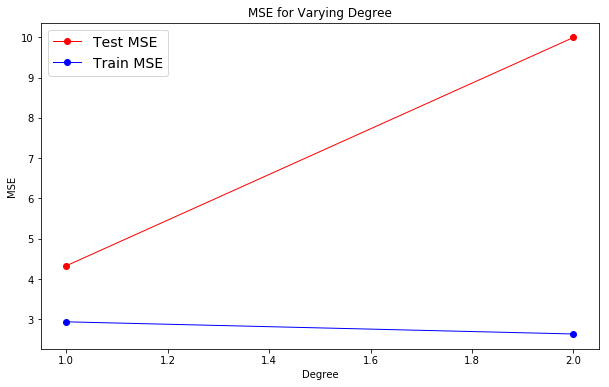

In [106]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

In [107]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [108]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.001 # Regularization Parameter<br>
learning_rate_opt = 'optimal' # (constant or updated during descent)<br>
l1_ratio_opt = 0.5<br>
max_iter_opt = 400<br>
eta0_opt = 0.1 # learning rate<br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [109]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.001 # Regularization Parameter
learning_rate_opt = 'optimal' # (constant or updated during descent)
l1_ratio_opt = 0.5
max_iter_opt = 400
eta0_opt = 0.1 # learning rate
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 4.445885
The r^2 value for this prediction is 0.387980


## Make Predictions on Target Using Imputed Values From Polynomial Regression Imputation

In [110]:
# Create Feature and Target Arrays

Y = df_model_linReg['Post Month'].values
X = df_model_linReg.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Modeling data using degree: 1
Modeling data using degree: 2


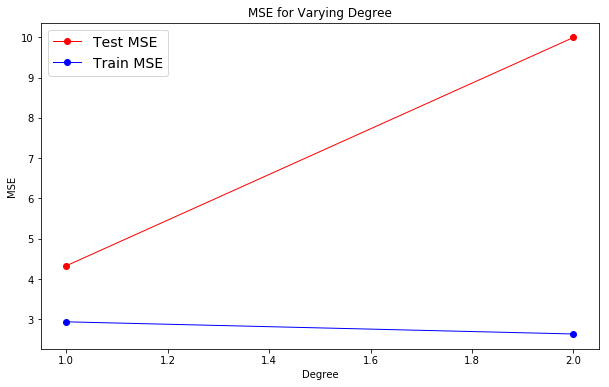

In [111]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

The above looks like overfitting beginning with order 2, so we will use 1st order regression.

In [112]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [113]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.1 # Regularization Parameter<br>
eta0_opt = 0.01 # learning rate<br>
l1_ratio_opt = 0.5<br>
learning_rate_opt = 'constant' # (constant or updated during descent)<br>
max_iter_opt = 1000<br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [114]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.1 # Regularization Parameter
eta0_opt = 0.01 # learning rate
l1_ratio_opt = 0.5
learning_rate_opt = 'constant' # (constant or updated during descent)
max_iter_opt = 1000
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 4.278157
The r^2 value for this prediction is 0.411069


## Make Predictions on Target Using Imputed Values From Random Forest Imputation

In [115]:
# Create Feature and Target Arrays

Y = df_model_randForest['Post Month'].values
X = df_model_randForest.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Modeling data using degree: 1
Modeling data using degree: 2


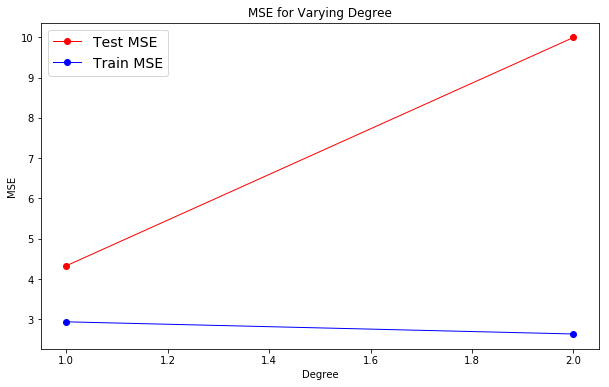

In [116]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

This looks like overfitting beginning at order 2, so we will use 1st order regression.

In [117]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [118]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.01 # Regularization Parameter<br>
eta0_opt = 0.01 # learning rate<br>
l1_ratio_opt = 0.5<br>
learning_rate_opt = 'constant' # (constant or updated during descent)<br>
max_iter_opt = 10000<br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [119]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.01 # Regularization Parameter
eta0_opt = 0.01 # learning rate
l1_ratio_opt = 0.5
learning_rate_opt = 'constant' # (constant or updated during descent)
max_iter_opt = 10000
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 4.491024
The r^2 value for this prediction is 0.381766


## Make Predictions on Target Using Imputed Values From ANN Imputation

In [120]:
# Create Feature and Target Arrays

Y = df_model_ANN['Post Month'].values
X = df_model_ANN.drop(columns=['Post Month']).values

# Scale this feature matrix
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Now separate into test and train portions, keeping 20% in the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Modeling data using degree: 1
Modeling data using degree: 2


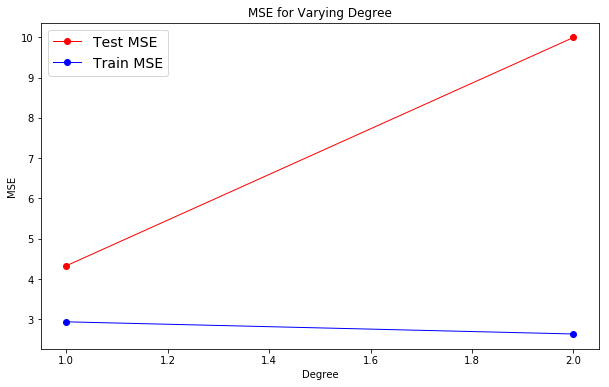

In [121]:
# We will first explore what order of polynomial may be the best predictor for the imputation target column
# For figuring out optimal complexity we use the default options for the linear regressor

degreeList = [1,2]
vary_degree_plot(degreeList,X_train,Y_train,X_test,Y_test)

This looks like overfitting beginning at order 2, so we will use 1st order regression.

In [122]:
# From the above results we have chosen an optimal polynomial model for imputing this missing data
# We choose 1st order
poly_degree = 1

# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Note that to check the cross-validation you need to uncomment the below box.<br>
It has been commented out for ease of investigation, as optimization only needs to be run once.

In [123]:
# # First do a grid search to optimize the model
# param_grid = {'alpha': [0.1, 0.01, 0.001], 'learning_rate': ["constant", "optimal"], 
#               'l1_ratio': [1, 0.5, 0.2, 0], 'max_iter':[100, 400, 1000, 10000],
#               'eta0': [0.01, 0.001, 0.1]}

# sgd = SGDRegressor()

# sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=5,
#                      n_jobs = -1, verbose = 2)
# sgd_cv.fit(X_train, Y_train)

# # print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
# print("Optimal Hyperparameter Values: ", sgd_cv.best_params_)

Here are the optimal hyperparameters we will use:<br>
alpha_opt = 0.001 # Regularization Parameter<br>
eta0_opt = 0.1 # learning rate<br>
l1_ratio_opt = 0.5<br>
learning_rate_opt = 'optimal' # (constant or updated during descent)<br>
max_iter_opt = 400<br>
penalty_opt = 'elasticnet' # Not chosen by cross-validation

In [124]:
# Using these parameters create SGDRegressor linear regression object
alpha_opt = 0.001 # Regularization Parameter
eta0_opt = 0.1 # learning rate
l1_ratio_opt = 0.5
learning_rate_opt = 'optimal' # (constant or updated during descent)
max_iter_opt = 400
penalty_opt = 'elasticnet' # Not chosen by cross-validation

# Below creates model based on above optimal parameters
lin_reg_sgd = SGDRegressor(max_iter=max_iter_opt, learning_rate=learning_rate_opt,
                           eta0=eta0_opt, penalty=penalty_opt, l1_ratio=l1_ratio_opt, alpha=alpha_opt)

# Fit the new model
lin_reg_sgd.fit(X_train, Y_train)

Y_test_pred = lin_reg_sgd.predict(X_test)
print('The mean squared error of this prediction is %f' %mean_squared_error(Y_test, Y_test_pred))
print('The r^2 value for this prediction is %f' %r2_score(Y_test,Y_test_pred))

The mean squared error of this prediction is 4.311145
The r^2 value for this prediction is 0.406528
